# Previsión de la inflación mexicana mediante redes neuronales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importar pytorch
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Descargado de https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarCuadro&idCuadro=CP151&locale=en

path = 'data/Consulta_03.csv'
df = pd.read_csv(path, sep=',', encoding='utf-8')
columnas = df.columns  
df.head()

,Fecha,Inflacion Indice de precios al consumidor (INPC) mensual,Inflacion Indice de precios al consumidor (INPC) acumulada en el anio,Inflacion Indice de precios al consumidor (INPC) anual,Inflacion subyacente mensual,Inflacion subyacente acumulada en el año,Inflacion subyacente anual,Inflacion no subyacente mensual,Inflacion no subyacente acumulada en el año,Inflacion no subyacente anual
0,01/01/1971,16.470588,-78.891258,5.117271,N/E,N/E,N/E,N/E,N/E,N/E
1,01/02/1971,-51.764706,-70.149254,14.712154,N/E,N/E,N/E,N/E,N/E,N/E
2,01/03/1971,-55.294118,-61.833689,16.631130,N/E,N/E,N/E,N/E,N/E,N/E
3,01/04/1971,-40.000000,-50.746269,25.159915,N/E,N/E,N/E,N/E,N/E,N/E
4,01/05/1971,-75.294118,-46.055437,25.159915,N/E,N/E,N/E,N/E,N/E,N/E


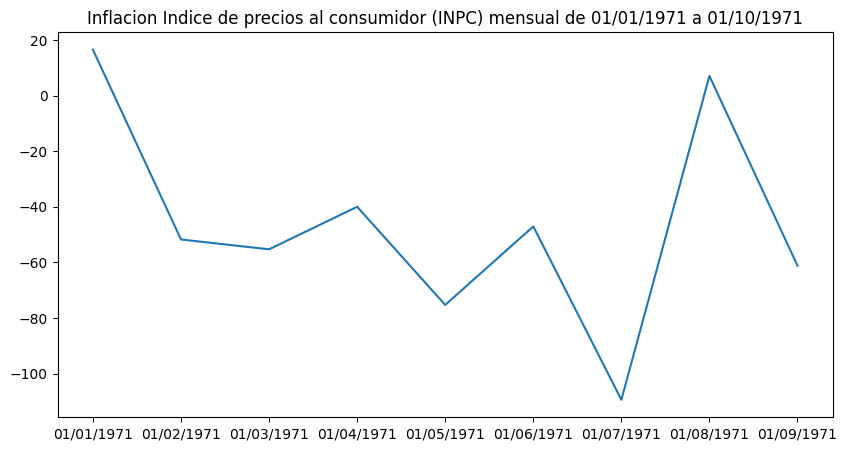

In [3]:
# Print Inflacion indice de precios al consumidor
num = 9
plt.figure(figsize=(10,5))
fecha_inicial = df['Fecha'][0]
fecha_final = df['Fecha'][num]

fecha = df['Fecha'][0:num]
inflacion = df[columnas[1]][0:num]
plt.plot(fecha, inflacion,)
plt.title(str(columnas[1])+" de "+str(fecha_inicial)+" a "+str(fecha_final))
plt.show()


In [4]:
INPC_mensual = df[columnas[1]]
INPC_acumulada = df[columnas[2]]
INPC_anual = df[columnas[3]]
Inflacion_subyacente_mensual = df[columnas[4]]
Inflacion_subyacente_acumulada = df[columnas[5]]
Inflacion_subyacente_anual = df[columnas[6]]
Inflacion_no_subyacente_mensual = df[columnas[7]]
Inflacion_no_subyacente_acumulada = df[columnas[8]]
Inflacion_no_subyacente_anual = df[columnas[9]]
fecha = df['Fecha']

In [5]:
eneros = list()
for f in fecha:
    anio = f.split('/')[2]
    anio = int(anio)
    mes = f.split('/')[1]
    mes = int(mes)
    # Seleccionar datos a partir de 1984
    if anio >= 1984:
        # Seleccionamos los eneros
        if mes == 1:
            eneros.append(f)

In [6]:
# Seleccionar los datos de enero
df_eneros = df[df['Fecha'].isin(eneros)]
df_eneros = df_eneros.reset_index(drop=True)
df_eneros.head()

,Fecha,Inflacion Indice de precios al consumidor (INPC) mensual,Inflacion Indice de precios al consumidor (INPC) acumulada en el anio,Inflacion Indice de precios al consumidor (INPC) anual,Inflacion subyacente mensual,Inflacion subyacente acumulada en el año,Inflacion subyacente anual,Inflacion no subyacente mensual,Inflacion no subyacente acumulada en el año,Inflacion no subyacente anual
0,01/01/1984,48.364486,-92.139143,-9.135925,22.99,-93.82,-12.36,144.28,-84.46,3.77
1,01/01/1985,74.588235,-87.457742,2.687627,24.41,-91.17,-0.27,245.39,-74.21,12.82
2,01/01/1986,29.809104,-86.133333,3.403922,92.15,-86.02,8.32,-36.29,-86.58,-10.93
3,01/01/1987,2.531646,-92.340426,-1.333333,7.65,-92.31,-0.49,-13.23,-92.50,-4.21
4,01/01/1988,4.671632,-90.287114,11.095056,6.02,-91.64,7.40,-0.99,-85.89,23.43


La forma en que los datos están estruturados es que cada entrada corresponde a un mes por cada entrada. Debido al gran número de datos faltantes tomaremos datos a partir de 01/01/1984

Haremos una ligera variación a lo que hace el articulo y tomaremos desde 1984 al 2021. Y compararemos las predicciones del 2021 al 2023.

Tomaremos los datos de enero como Inflacion Indice de precios al consumidor (INPC) mensual, Inflacion Indice de precios al consumidor (INPC) acumulada en el anio, Inflacion subyacente mensual,Inflacion subyacente acumulada en el año, Inflacion subyacente anual,Inflacion no subyacente mensual,Inflacion no subyacente acumulada en el año, Inflacion no subyacente anual como features y la Inflacion Indice de precios al consumidor (INPC) anual como target.


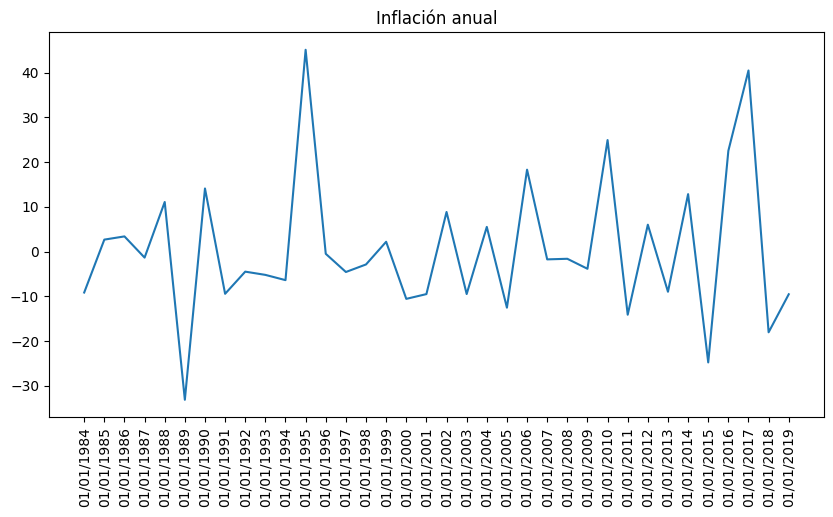

In [7]:
# Nuestro objetivo es predecir la inflación anual
# Seleccionamos la inflación anual
inflacion_anual = df_eneros[columnas[3]]
inflacion_anual = inflacion_anual[0:36]
fecha = df_eneros['Fecha']
fecha = fecha[0:36]
plt.figure(figsize=(10,5))
plt.plot(fecha, inflacion_anual)
plt.title("Inflación anual")
plt.xticks(rotation=90)
plt.show()

In [8]:
# Normalizar los datos
inflacion_anual = np.array(inflacion_anual)
# Definir y con:
#INPC_anual = df[columnas[3]]
y = df_eneros[columnas[3]]
# Definir X con:
X = np.array(df_eneros[[columnas[1], columnas[2], columnas[4], columnas[5], columnas[6], columnas[7], columnas[8], columnas[9]]])
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Convertir a tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.shape, y.shape)

torch.Size([41, 8]) torch.Size([41])


En Chavez y Cortez,2013 «De la base de datos, el 70% de los datos se utilizará para entrenar la NN y el 30% restante para medir su rendimiento según el error cuadrático medio (MSE). Se seleccionará el modelo de NN con menor MSE para predecir la inflación. La función de activación utilizada en las capas ocultas fue la tangente hiperbólica y el resto de las especificaciones se establecieron con los valores por defecto de Matlab.»

In [9]:
# Definir y utilizar conjunto de validación
# El 70% de los datos serán para entrenamiento, el 15% para validación y el 15% para prueba
n = len(X)
n_train = int(0.7*n)
n_val = int(0.15*n)
indices = np.random.permutation(n)

train_indices, val_indices, test_indices = indices[:n_train], indices[n_train:n_train+n_val], indices[n_train+n_val:]
X_train, X_val, X_test = X[train_indices], X[val_indices], X[test_indices]
y_train, y_val, y_test = y[train_indices], y[val_indices], y[test_indices]
print(X_train.shape, X_val.shape, X_test.shape)


torch.Size([28, 8]) torch.Size([6, 8]) torch.Size([7, 8])


En Chavez y Cortez,2013 encontraron que el modelo con el mejor MSE fue un modelo NN con 1 capa oculta y 49 neuronas ocultas. Este modelo NN se seleccionó para predecir la inflación anual

In [10]:
#Crear el modelo
# The model with the best MSE was a NN model with 1 hidden layer and 49 hidden neurons. This NN model was selected to forecast annual inflation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 49)
        self.fc2 = nn.Linear(49, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Crear el modelo
model = Net()
# Definir la función de pérdida
loss_function = nn.MSELoss()
# Definir el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Entrenar el modelo usando el conjunto de entrenamiento y validación
n_epochs = 10000
loss_train = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_function(y_pred.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    loss_train.append(loss.item())
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.0064159175381064415
Epoch: 1000, Loss: 0.0006318698287941515
Epoch: 2000, Loss: 6.353908247547224e-05
Epoch: 3000, Loss: 0.00037772441282868385
Epoch: 4000, Loss: 0.0034297762904316187
Epoch: 5000, Loss: 0.000831114302854985
Epoch: 6000, Loss: 0.0001256839750567451
Epoch: 7000, Loss: 7.663637370569631e-05
Epoch: 8000, Loss: 0.0002544845046941191
Epoch: 9000, Loss: 0.0004474443558137864


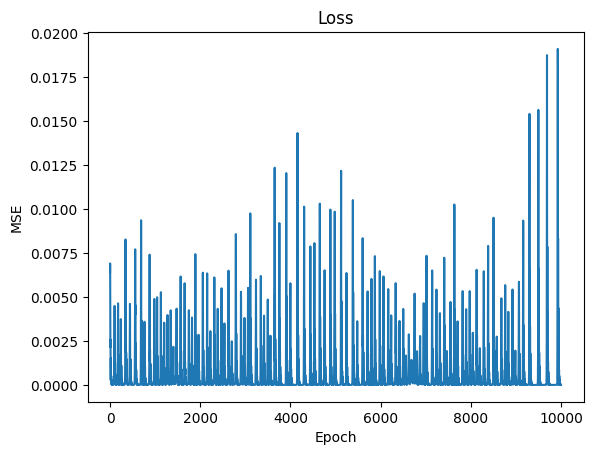

In [16]:
# Graficar la función de pérdida
plt.plot(loss_train)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

Error: 658.1985473632812


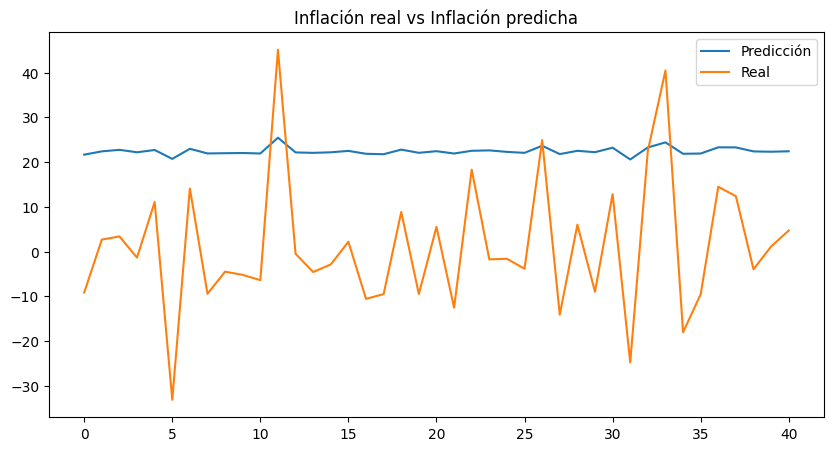

In [17]:
# Predecir la inflación
# Normalizar los datos
X = scaler.transform(X)
# Convertir a tensor
X = torch.tensor(X, dtype=torch.float32)
# Predecir
y_pred = model(X)
y_pred = y_pred.view(-1)
# Calcular el error
error = loss_function(y_pred, y)
print(f'Error: {error.item()}')
# Graficar la inflación real y la inflación predicha
plt.figure(figsize=(10,5))
plt.plot(y_pred.detach().numpy(), label='Predicción')
plt.plot(y.detach().numpy(), label='Real')
plt.legend()
plt.title('Inflación real vs Inflación predicha')
plt.show()

In [18]:
# Evaluar el modelo
# Calcular el error cuadrático medio
from sklearn.metrics import mean_squared_error
y_pred = y_pred.detach().numpy()
y = y.detach().numpy()

mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# Calcular el error absoluto medio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print(f'MAE: {mae}')

# Matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = np.where(y_pred > 0, 1, 0)
y = np.where(y > 0, 1, 0)
cm = confusion_matrix(y, y_pred)
print(cm)


MSE: 658.198486328125
MAE: 23.12097930908203
[[ 0 23]
 [ 0 18]]


Error: 53.18088912963867


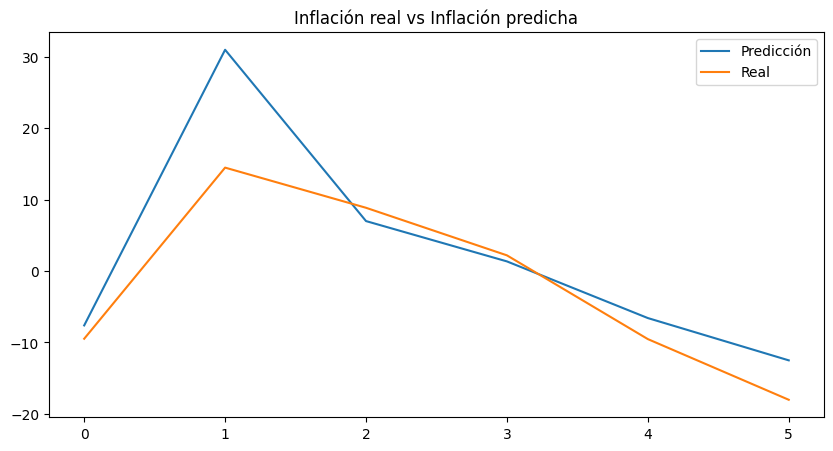

In [20]:
# Evaluar el modelo con el conjunto de validación
model.eval()
y_pred = model(X_val)
y_pred = y_pred.view(-1)
# Calcular el error
error = loss_function(y_pred, y_val)
print(f'Error: {error.item()}')
# Graficar la inflación real y la inflación predicha
plt.figure(figsize=(10,5))
plt.plot(y_pred.detach().numpy(), label='Predicción')
plt.plot(y_val.detach().numpy(), label='Real')
plt.legend()

plt.title('Inflación real vs Inflación predicha')
plt.show()

In [21]:
# Comparemos las predicciones del 2021 al 2023 del modelo con las del banco de Mexico

# Seleccionar los datos del 2021 al 2023
df_2021_2023 = df_eneros[df_eneros['Fecha'].str.contains('2021|2022|2023')]
df_2021_2023 = df_2021_2023.reset_index(drop=True)
df_2021_2023.head()

,Fecha,Inflacion Indice de precios al consumidor (INPC) mensual,Inflacion Indice de precios al consumidor (INPC) acumulada en el anio,Inflacion Indice de precios al consumidor (INPC) anual,Inflacion subyacente mensual,Inflacion subyacente acumulada en el año,Inflacion subyacente anual,Inflacion no subyacente mensual,Inflacion no subyacente acumulada en el año,Inflacion no subyacente anual
0,01/01/2021,126.315789,-72.698413,12.380952,-34.55,-90.53,1.05,-1946.15,103.39,122.88
1,01/01/2022,63.888889,-91.983696,-3.940217,-22.50,-89.56,4.55,-157.78,-95.57,-17.55
2,01/01/2023,78.947368,-91.304348,1.150895,9.23,-91.50,1.20,-242.50,-90.91,0.80


torch.Size([3, 8]) torch.Size([3])
Error: 1.6586952209472656


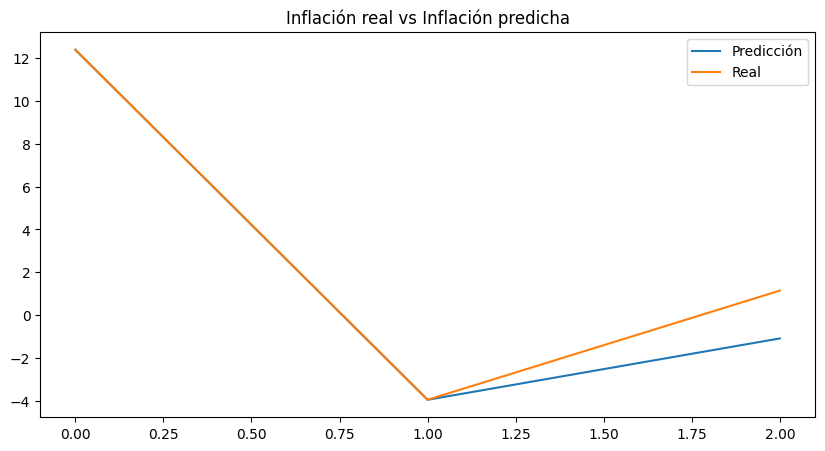

In [23]:
# Definir y con:
y = df_2021_2023[columnas[3]]
# Definir X con:
X = np.array(df_2021_2023[[columnas[1], columnas[2], columnas[4], columnas[5], columnas[6], columnas[7], columnas[8], columnas[9]]])
# Normalizar los datos
X = scaler.transform(X)
# Convertir a tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.shape, y.shape)

# Predecir
y_pred = model(X)
y_pred = y_pred.view(-1)
# Calcular el error
error = loss_function(y_pred, y)
print(f'Error: {error.item()}')
# Graficar la inflación real y la inflación predicha
plt.figure(figsize=(10,5))
plt.plot(y_pred.detach().numpy(), label='Predicción')
plt.plot(y.detach().numpy(), label='Real')
plt.legend()
plt.title('Inflación real vs Inflación predicha')
plt.show()